In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## sampling TGEMs

![alt text](./PoissonNets_examples.PNG)

On suppose que les evenements ont lieu dans l'interval W = [0, 100]

In [8]:
W_min, W_max = 0, 100
win_len = W_max - W_min

### (A)

### description du model 

In [131]:
%%latex
\begin{align}
nodes = A \\
edges = \emptyset \\
timescales = \emptyset \\
\lambda_{A}(t \mid h) = 1/10 \\

\end{align}

<IPython.core.display.Latex object>

In [132]:
lambda_A = 1/10

lambda_A (rate function) est constant, le noeud A n'a pas de parent, ceci revient donc à échentillonner (?) un processus de Poisson homogene.

### Sampling

In [133]:
#documentation uniform
np.random.uniform?

In [134]:
#étape 1: nombre de réalistion de l'évenement A attendu est:
espA = lambda_A * (win_len)
#étape 2: placement des aléatoire des points de A 
A_t = np.random.uniform(low=W_min, high=W_max, size=int(espA))
#tri
A_t = np.sort(A_t)

### Calcul de vraisemblence

In [802]:
samplde_data_model_A = pd.DataFrame(data={'time': A_t, 'lambda_A_t': [lambda_A] * len(A_t)})

In [803]:
model_A_count_drt_df = get_count_duration_df(samplde_data_model_A, 'lambda_A_t', 'time')

In [804]:
model_A_count_drt_df

,count,duration,lambda_l_t
0,250,00:01:39.913273,2.5


In [891]:
 model_A_count_drt_df['duration'].dt.total_seconds()

0    99.913273
Name: duration, dtype: float64

In [816]:
(lambda_A ** model_A_count_drt_df['count']) * np.exp(-lambda_A * model_A_count_drt_df['duration'].dt.total_seconds())

0    1.012848e-09
dtype: float64

In [809]:
#likelihood, model 1 y u do dis to me :( fffffffffffffffffffffuuuuuuuuuuuuuuuu
#compute_likelihood(model_A_count_drt_df)

1.0128481426449589e-09

### (A) -> (B)

In [678]:
%%latex
\begin{align}
nodes = A, B \\
edges = (A, B) \\
timescales = T_{A \rightarrow B} = {(0,5],(5, 20]} \\
\lambda_{A}(t \mid h) = 2.5 \\
\lambda_{B \mid 00}(t \mid h) = 0.003 \\
\lambda_{B \mid 01}(t \mid h) = 5 \\
\lambda_{B \mid 10}(t \mid h) = 2 \\
\lambda_{B \mid 11}(t \mid h) = 5 \\

\end{align}

<IPython.core.display.Latex object>

In [890]:
data

,index,event,"t-5,t","t-5,t-10",C_B,lambda_B
0,00:00:01.307587,65,1.0,0.0,"(0, 0)",0.003
1,00:00:01.393423,65,2.0,0.0,"(1, 0)",3.000
2,00:00:01.587395,65,3.0,0.0,"(1, 0)",3.000
3,00:00:02.211518,65,4.0,0.0,"(1, 0)",3.000
4,00:00:02.255471,65,5.0,0.0,"(1, 0)",3.000
5,00:00:02.283061,65,6.0,0.0,"(1, 0)",3.000
6,00:00:02.519888,65,7.0,0.0,"(1, 0)",3.000
7,00:00:02.540972,65,8.0,0.0,"(1, 0)",3.000
8,00:00:03.351419,65,9.0,0.0,"(1, 0)",3.000
9,00:00:03.686735,65,10.0,0.0,"(1, 0)",3.000


In [679]:
lambda_A = 2.5
lambda_B = {
            (0,0): 0.003, \
            (0,1): 1.6, \
            (1,0): 3, \
            (1,1) : 1
            }

### Sampling

In [680]:
#on commence par A

In [681]:
#étape 1: nombre de réalistion de l'évenement A attendu est:
espA = lambda_A * (win_len)
#étape 2: placement des aléatoire des points de A 
A_t = np.random.uniform(low=W_min, high=W_max, size=int(espA))
#tri
A_t = np.sort(A_t)

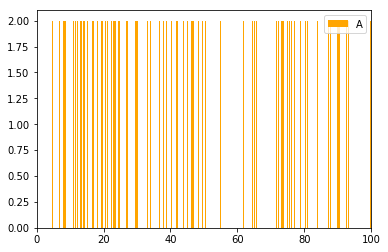

In [682]:
plt.bar(A_t, height=2, width=0.1, color='orange')
plt.legend('A')
plt.xlim(0,100)
plt.show()

In [683]:
#lambda_B[0,0]

In [684]:
#A est independent de B, on commmence par le sampling de A, 
data = pd.DataFrame(index=pd.to_timedelta(A_t, unit='s'), data={'event': [ord('A')] * len(A_t)})

In [685]:
#parent A count in interval [0,5]
data['t-5,t'] = data.rolling('5S')['event'].count()

In [686]:
#parent A count in interval [5,20]
data['t-5,t-10'] = data.rolling('20S')['event'].count() - data['t-5,t']

In [687]:
#seuillage pour avoir les vecteurs de comptage (seuil fixé à 1)
data['C_B'] = data.apply(lambda row: tuple((row[['t-5,t', 't-5,t-10']] > 1 ) * 1), axis=1)

In [688]:
data['lambda_B'] = data['C_B'].transform(lambda cb: lambda_B[cb])

In [689]:
data

,event,"t-5,t","t-5,t-10",C_B,lambda_B
00:00:01.307587,65,1.0,0.0,"(0, 0)",0.003
00:00:01.393423,65,2.0,0.0,"(1, 0)",3.000
00:00:01.587395,65,3.0,0.0,"(1, 0)",3.000
00:00:02.211518,65,4.0,0.0,"(1, 0)",3.000
00:00:02.255471,65,5.0,0.0,"(1, 0)",3.000
00:00:02.283061,65,6.0,0.0,"(1, 0)",3.000
00:00:02.519888,65,7.0,0.0,"(1, 0)",3.000
00:00:02.540972,65,8.0,0.0,"(1, 0)",3.000
00:00:03.351419,65,9.0,0.0,"(1, 0)",3.000
00:00:03.686735,65,10.0,0.0,"(1, 0)",3.000


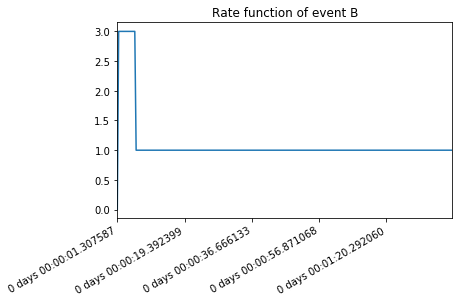

In [690]:
data['lambda_B'].plot()
plt.title('Rate function of event B')#notice how it's piecewise constant
plt.show()

In [691]:
data.reset_index(inplace=True)

In [823]:
data

,index,event,"t-5,t","t-5,t-10",C_B,lambda_B
0,00:00:01.307587,65,1.0,0.0,"(0, 0)",0.003
1,00:00:01.393423,65,2.0,0.0,"(1, 0)",3.000
2,00:00:01.587395,65,3.0,0.0,"(1, 0)",3.000
3,00:00:02.211518,65,4.0,0.0,"(1, 0)",3.000
4,00:00:02.255471,65,5.0,0.0,"(1, 0)",3.000
5,00:00:02.283061,65,6.0,0.0,"(1, 0)",3.000
6,00:00:02.519888,65,7.0,0.0,"(1, 0)",3.000
7,00:00:02.540972,65,8.0,0.0,"(1, 0)",3.000
8,00:00:03.351419,65,9.0,0.0,"(1, 0)",3.000
9,00:00:03.686735,65,10.0,0.0,"(1, 0)",3.000


In [704]:
t = W_min
B_t = np.array([])
lambda_b_t = np.array([])

while t < W_max:
    t_lambda_change = data[data['index'].dt.total_seconds() <= t]['index'].shape[0] - 1
    
    if t_lambda_change == -1:
        lambda_B_t = lambda_B[0,0]
    else:
        lambda_B_t = data.iloc[t_lambda_change]['lambda_B']
    
    y = np.random.uniform()
    waiting_time = -np.log(1-y) / lambda_B_t
    
    if t_lambda_change + 1 == len(data) or t + waiting_time <= data['index'].dt.total_seconds()[t_lambda_change + 1]: 
        t += waiting_time
        B_t = np.append(B_t, t)
        lambda_b_t = np.append(lambda_b_t, lambda_B_t)
    else:
        t = data['index'].dt.total_seconds()[t_lambda_change + 1]


In [705]:
A_t = pd.to_timedelta(A_t, unit='s')
B_t = pd.to_timedelta(B_t, unit='s')

time = A_t.append(B_t)
sampled_data = pd.DataFrame(index=time, data={'event': ['B'] * len(time)})
sampled_data.loc[A_t] = 'A'
sampled_data.sort_index(inplace=True)

In [706]:
sampled_data

,event
00:00:01.307587,A
00:00:01.393423,A
00:00:01.587395,A
00:00:02.211518,A
00:00:02.255471,A
00:00:02.283061,A
00:00:02.361444,B
00:00:02.519888,A
00:00:02.540972,A
00:00:02.677935,B


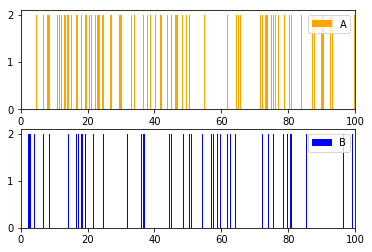

In [707]:
plt.subplot(2, 1, 1)
plt.bar(A_t.total_seconds(), height=2, width=0.1, color='orange')
plt.legend('A')
plt.xlim(0,100)

plt.subplot(2, 1, 2)
plt.bar(B_t.total_seconds(), height=2, width=0.1, color='blue')
plt.legend('B')
plt.xlim(0,100)

plt.show()

## calcul de vraisemblence

In [708]:
%%latex
\begin{align}
p(x_{t^{*}} \mid t^{*}) = \prod_{l \in \mathcal{L}} \prod_{j \in \mathcal{C_{l}}} \
\lambda_{l,j}^{n_{t^{*}, l, j}(x_{t^{*}})}e^{-\lambda_{l,j}d_{t^{*},l,j}(x_{t^{*}})}
\end{align}

<IPython.core.display.Latex object>

In [709]:
sampled_data['lambda_t'] = lambda_A

In [712]:
sampled_data.loc[sampled_data['event'] == 'B', 'lambda_t'] = lambda_b_t

In [740]:
sampled_data.reset_index(inplace=True)

In [801]:
def get_count_duration_df(data, lambda_col='lambda_t', time_col='index'):
    lambda_vals = data[lambda_col].unique()
    lambda_count_duration_df = pd.DataFrame(data={'lambda_l_t': lambda_vals,\
                                              'count': [0] * len(lambda_vals),\
                                              'duration': [0] * len(lambda_vals)
                                             }
                                       )
    lambda_count_duration_df['duration'] = lambda_count_duration_df['lambda_l_t'].apply(lambda lm: (((data[lambda_col] == lm) * 1.0) * (data[time_col] - data[time_col].shift().fillna(0))).sum())
    lambda_count_duration_df['count'] = lambda_count_duration_df['lambda_l_t'].apply(lambda lm: (data[lambda_col] == lm).sum())
    
    return lambda_count_duration_df

In [805]:
def compute_likelihood(count_duration_df):
    return ((count_duration_df['lambda_l_t'] ** count_duration_df['count']) * 
            np.exp(-count_duration_df['lambda_l_t'] * count_duration_df['duration'].dt.total_seconds())).prod()

In [829]:
lambda_count_duration_df

,count,duration,lambda_l_t
0,250,00:01:06.309092,2.5
1,21,00:00:03.103612,3.0
2,114,00:00:31.350700,1.0


In [795]:
%time lambda_count_duration_df = get_count_duration_df(sampled_data)

Wall time: 16 ms


In [807]:
#likelihood, model 2 y u do dis to me :( fffffffffffffffffffffuuuuuuuuuuuuuuuu
compute_likelihood(lambda_count_duration_df)

7.1004329650588631e+19

## (A) - > (B) -> (A)

In [892]:
%%latex
\begin{align}
nodes: A, B \\
edges: (A, B), (B, A) \\
timescales: T_{A \rightarrow B} = {(0,5],(6, 13], (30,45]}, T_{B \rightarrow A} = {(0,3],(5, 13]} \\
\lambda_{A \mid 00}(t \mid h) = 2.5 \\
\lambda_{A \mid 01}(t \mid h) = 4 \\
\lambda_{A \mid 11}(t \mid h) = 0.1 \\
\lambda_{A \mid 10}(t \mid h) = 0.01 \\

\lambda_{B \mid 000}(t \mid h) = 0.3 \\
\lambda_{B \mid 001}(t \mid h) = 5 \\
\lambda_{B \mid 010}(t \mid h) = 3 \\
\lambda_{B \mid 100}(t \mid h) = 1.1 \\
\lambda_{B \mid 011}(t \mid h) = 4.3 \\
\lambda_{B \mid 110}(t \mid h) = 3 \\
\lambda_{B \mid 101}(t \mid h) = 1 \\
\lambda_{B \mid 111}(t \mid h) = 2 \\

\end{align}

<IPython.core.display.Latex object>

In [936]:
T_A_pa = [[0,3], [5,13]]
T_B_pa = [[0,5], [6,13], [30,45]]

In [935]:
T_B_pa

[[0, 5], [6, 13], [30, 45]]

In [911]:
lambda_A = {
            (0,0): 2.5, \
            (0,1): 4, \
            (1,0): 0.01, \
            (1,1) : 0.1
            }
lambda_B = {
            (0,0,0): 0.3, \
            (0,0,1): 5, \
            (0,1,0): 3, \
            (1,0,0) : 1.1, \
            (0,1,1): 4.3, \
            (1,1,0): 3, \
            (1,0,1): 1, \
            (1,1,1): 2
            }

In [922]:
t_until_change_lambda_A = np.random.uniform(W_max, size=np.random.randint(len(lambda_A) * 2))
t_until_change_lambda_A = (np.cumsum(t_until_change_lambda_A) / np.sum(t_until_change_lambda_A)) * 100

In [924]:
t_until_change_lambda_B = np.random.uniform(W_max, size=np.random.randint(len(lambda_B) * 2))
t_until_change_lambda_B = (np.cumsum(t_until_change_lambda_B) / np.sum(t_until_change_lambda_B)) * 100

In [992]:
def get_parent_count_vector(t, parent_time_serie, timescales):
    count_vect = np.repeat(repeats=len(timescales), a=0)
    for i, (a, b) in enumerate(timescales):
        count_vect[i] = ((parent_time_serie > t - b) & (parent_time_serie <= t - a)).sum()
    count_vect = (count_vect >= 1) * 1
    return tuple(count_vect)

In [1057]:
time_serie = {
              'A_t':  np.array([]), \
              'B_t': np.array([])
             }
t = W_min
lambda_t = np.array([])
lambda_A_t, lambda_B_t = lambda_A[0,0], lambda_B[0,0,0]
while t < W_max:
    Y = np.random.uniform(size=2)
    taus = -np.log(1-Y) / np.array([lambda_A_t,lambda_B_t])
    
    lambda_unchanged_t = (t_until_change_lambda_A[t_until_change_lambda_A >= t][0], \
                         t_until_change_lambda_B[t_until_change_lambda_B >= t][0])
    
    min_tau_i = taus.argmin()
    if taus[min_tau_i] <= lambda_unchanged_t[min_tau_i]:
        lambda_t = np.append(lambda_t, [lambda_A_t,lambda_B_t][min_tau_i])
        t += taus[min_tau_i]
        event_name = list(time_serie.keys())[min_tau_i]
        time_serie[event_name] = np.append(time_serie[event_name], t)
        
        pcv = get_parent_count_vector(t, time_serie[event_name], [T_A_pa, T_B_pa][min_tau_i])
        [lambda_A_t,lambda_B_t][min_tau_i] = [lambda_A, lambda_B][min_tau_i][pcv]
    else:
        t = lambda_unchanged_t[min_tau_i]

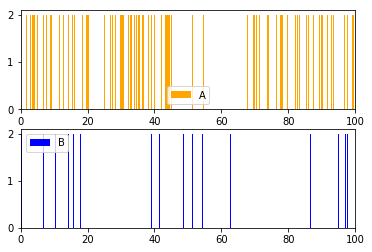

In [1058]:
plt.subplot(2, 1, 1)
plt.bar(time_serie['A_t'], height=2, width=0.1, color='orange')
plt.legend('A')
plt.xlim(0,100)

plt.subplot(2, 1, 2)
plt.bar(time_serie['B_t'], height=2, width=0.1, color='blue')
plt.legend('B')
plt.xlim(0,100)

plt.show()

In [1059]:
sampled_data_model_cycle = pd.DataFrame(index=np.append(time_serie['A_t'], time_serie['B_t']))

In [1060]:
sampled_data_model_cycle.loc[time_serie['A_t'], 'event'] = 'A'
sampled_data_model_cycle.loc[time_serie['B_t'], 'event'] = 'B'

In [1054]:
sampled_data_model_cycle.sort_index(inplace=True)

In [1062]:
sampled_data_model_cycle['lambda_t'] = lambda_t

In [1063]:
sampled_data_model_cycle

,event,lambda_t
0.067542,A,0.3
0.166130,A,2.5
0.415574,A,2.5
0.695989,A,0.3
0.974153,A,2.5
1.571051,A,2.5
1.759878,A,2.5
2.993646,A,2.5
3.324816,A,2.5
3.328320,A,2.5


In [1065]:
%time lambda_count_duration_df = get_count_duration_df(sampled_data_model_cycle.reset_index())

Wall time: 334 ms


In [1066]:
lambda_count_duration_df

,count,duration,lambda_l_t
0,35,39.014431,0.3
1,264,58.585641,2.5
